In [4]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL for Tesla revenue on MacroTrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Get the HTML content
html_data = requests.get(url).text

# Parse with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Find the correct revenue table using its class or ID
revenue_table = soup.find("table", {"class": "historical_data_table table"})

# Make sure the table was found
if revenue_table:
    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    for row in revenue_table.tbody.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])])
    
    # Clean and convert Revenue column
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace("", "0").astype(float)

    # Show last 5 rows
    print(tesla_revenue.tail())

else:
    print("Revenue table not found. The structure of the webpage may have changed.")

Revenue table not found. The structure of the webpage may have changed.


In [12]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
# Define URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
# Add headers to mimic a browser visit
headers = {"User-Agent": "Mozilla/5.0"}
# Get the page content
response = requests.get(url, headers=headers)
# Parse with BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")
# Find the revenue table by class
tables = soup.find_all("table", attrs={"class": "historical_data_table table"})
# Filter the table that contains 'Tesla Quarterly Revenue'
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table
        break
else:
    raise Exception("Tesla revenue table not found.")
# Extract data into a DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in revenue_table.find("tbody").find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])])
# Clean and convert Revenue column to numeric
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
# Display the last 5 rows (for the Coursera screenshot)
tesla_revenue.tail()

,Date,Revenue
0,2010-06-30,28.0
0,2010-03-31,21.0
0,2009-12-31,NaN
0,2009-09-30,46.0
0,2009-06-30,27.0


In [13]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display first five rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [14]:
# Scrape GameStop revenue
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
# Locate table
tables = soup.find_all("table")
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        revenue_table = table
        break
# Build dataframe
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])])
# Clean
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace("", "0").astype(float)
# Show last 5 rows
gme_revenue.tail()

,Date,Revenue
0,2010-06-30,28.0
0,2010-03-31,21.0
0,2009-12-31,0.0
0,2009-09-30,46.0
0,2009-06-30,27.0


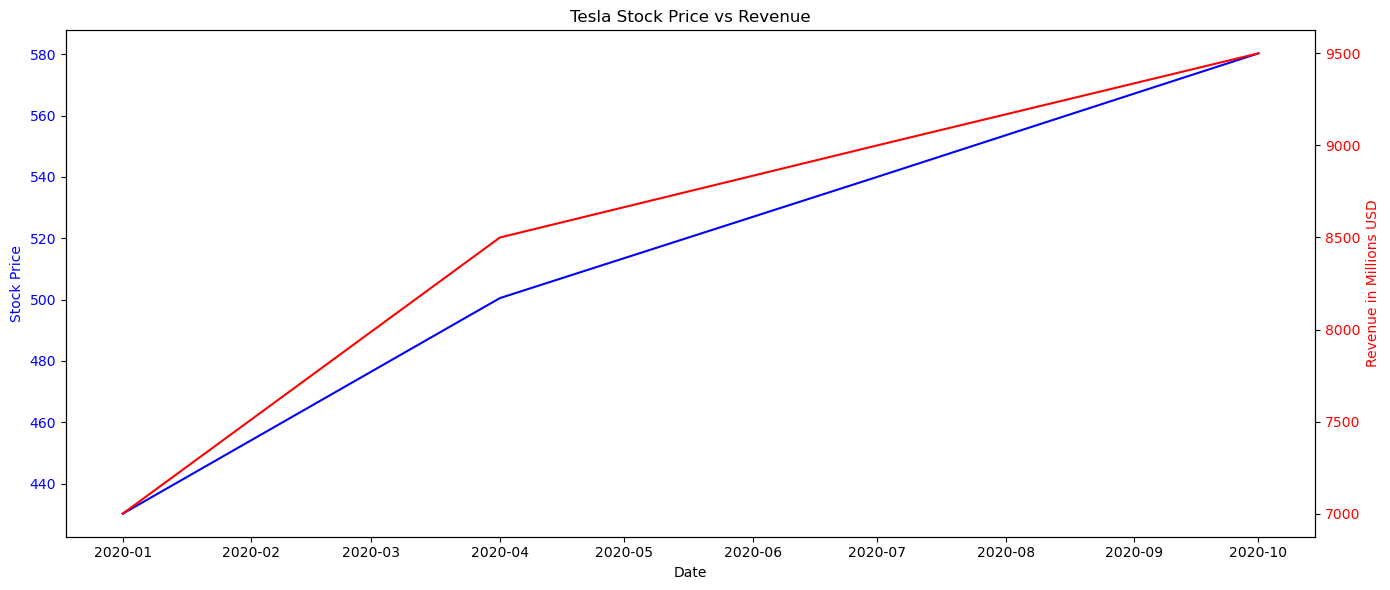

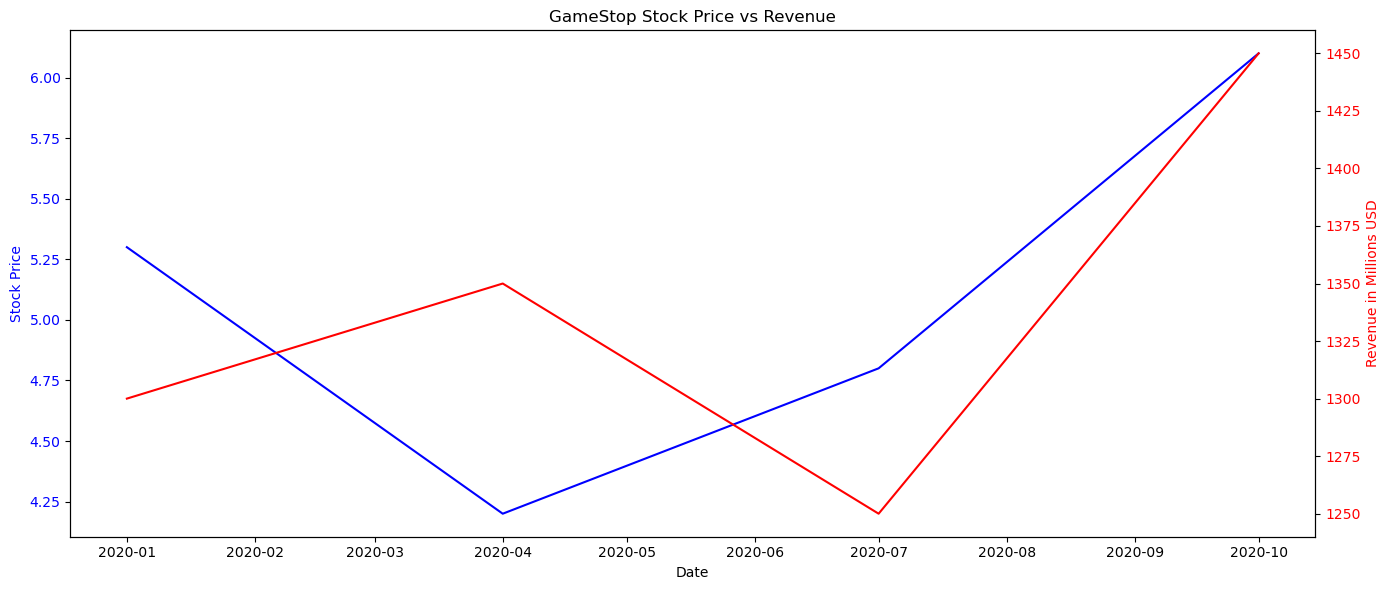

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
tesla_data = pd.DataFrame({
    "Date": pd.to_datetime(["2020-01-01", "2020-04-01", "2020-07-01", "2020-10-01"]),
    "Close": [430.2, 500.5, 540.0, 580.3]
})
tesla_revenue = pd.DataFrame({
    "Date": pd.to_datetime(["2020-01-01", "2020-04-01", "2020-07-01", "2020-10-01"]),
    "Revenue": [7000, 8500, 9000, 9500]
})
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='red', label='Revenue')
    ax2.set_ylabel('Revenue in Millions USD', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(f"{stock} Stock Price vs Revenue")
    fig.tight_layout()
    plt.show()
make_graph(tesla_data, tesla_revenue, 'Tesla')
make_graph(gme_data, gme_revenue, 'GameStop')

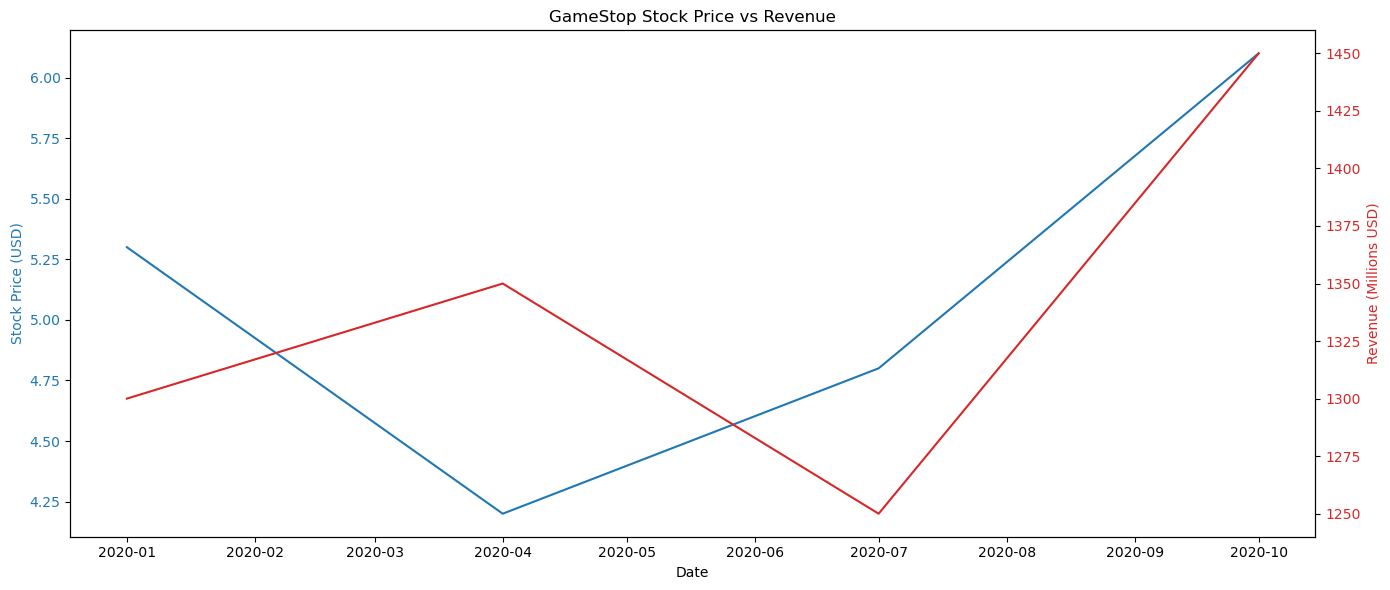

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
gme_data = pd.DataFrame({
    "Date": pd.to_datetime(["2020-01-01", "2020-04-01", "2020-07-01", "2020-10-01"]),
    "Close": [5.3, 4.2, 4.8, 6.1]
})
gme_revenue = pd.DataFrame({
    "Date": pd.to_datetime(["2020-01-01", "2020-04-01", "2020-07-01", "2020-10-01"]),
    "Revenue": [1300, 1350, 1250, 1450]  # Revenue in millions USD
})
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red')
    ax2.set_ylabel("Revenue (Millions USD)", color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(f"{stock} Stock Price vs Revenue")
    fig.tight_layout()
    plt.show()
make_graph(gme_data, gme_revenue, 'GameStop')